In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [14]:
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')


Mounted at /content/drive


In [21]:
import pandas as pd

# Specify the path to your CSV file
file_path = '/content/drive/MyDrive/house.csv'

# Load the dataset into a DataFrame
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Display the first few rows of the data to verify it's loaded correctly
df.head()


Property_Name  Property_id Property_type     Property_status  \
0               Arkiton Luxe     15446514     Apartment  Under Construction   
1  Keshav Akshar Ocean Pearl     15367414     Apartment  Under Construction   
2            Vishwa Opulence     14683118     Apartment       Ready to move   
3              Satyam Sarjan      5476295     Apartment       Ready to move   
4           Navkar Sunflower     15477040     Apartment  Under Construction   

  Price_per_unit_area   Posted_On  \
0               4,285   1 day ago   
1               7,000  2 days ago   
2               5,752  2 days ago   
3               2,486  5 days ago   
4               5,324  8 days ago   

                                         Project_URL   builder_id  \
0  https://www.makaan.com/ahmedabad/arkiton-life-...  100563465.0   
1  https://www.makaan.com/ahmedabad/keshav-naraya...  100009433.0   
2  https://www.makaan.com/ahmedabad/vishwa-develo...  100207731.0   
3  https://www.makaan.com/ahmedabad/satyam-develo...     101303.0   
4  https://www.makaan.com/ahmedabad/navkar-buildc...    1484209.0   

                  Builder_name Property_building_status  ...  is_furnished  \
0           Arkiton life Space                   ACTIVE  ...   Unfurnished   
1         Keshav Narayan Group                   ACTIVE  ...   Unfurnished   
2  Vishwa Developers Ahmedabad                   ACTIVE  ...   Unfurnished   
3            Satyam Developers                   ACTIVE  ...   Unfurnished   
4    Navkar Buildcon Ahmedabad                   ACTIVE  ...   Unfurnished   

  listing_domain_score is_plot  is_RERA_registered is_Apartment  \
0                  4.0   False                True         True   
1                  4.0   False                True         True   
2                  4.0   False               False         True   
3                  4.0   False               False         True   
4                  4.0   False                True         True   

   is_ready_to_move  is_commercial_Listing is_PentaHouse is_studio  \
0             False                  False         False     False   
1             False                  False         False     False   
2              True                  False         False     False   
3              True                  False         False     False   
4             False                  False         False     False   

   Listing_Category  
0              sell  
1              sell  
2              sell  
3              sell  
4              sell  

[5 rows x 32 columns]

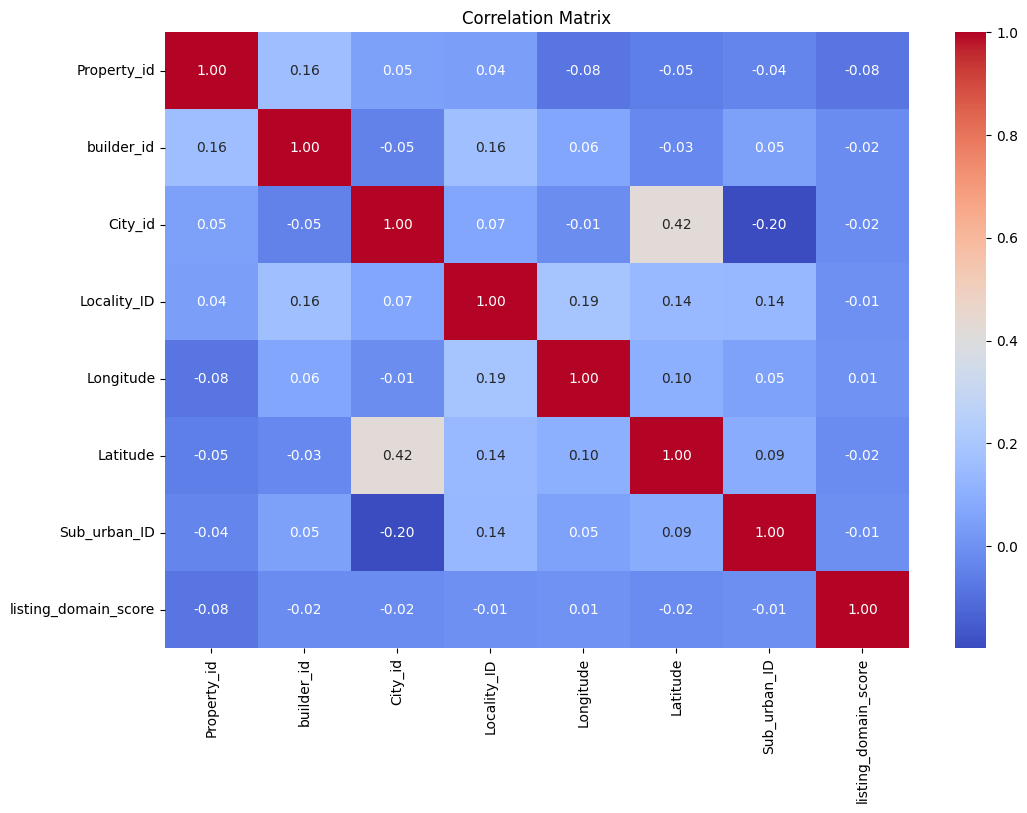

In [18]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['number'])

# Compute the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()




In [20]:
# Identify numeric columns
numeric_columns = df.select_dtypes(include=['number']).columns

# Fill missing values with the median for numeric columns
df[numeric_columns] = df[numeric_columns].fillna(df[numeric_columns].median())

# Optionally, fill missing values in non-numeric columns with a default value (e.g., 'Unknown')
non_numeric_columns = df.select_dtypes(exclude=['number']).columns
df[non_numeric_columns] = df[non_numeric_columns].fillna('Unknown')
